In [ ]:
# @title O XGBoost não está instalado por default no Google Colab. Nesse caso, precisamos instalar via pip.
!pip install scikit-learn xgboost

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
def calculate_mape(y_true, y_pred):
    # Evitar divisão por zero
    y_true = np.where(y_true == 0, 1e-10, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/cogenital_sy.csv")

In [ ]:
df

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41757,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,3.0,1.0,4.0,0.0,1.0,3.0,0.0,3.0,25.0
41758,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,15.0
41759,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,23.0
41760,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,3.0,2.0,2.0,25.0


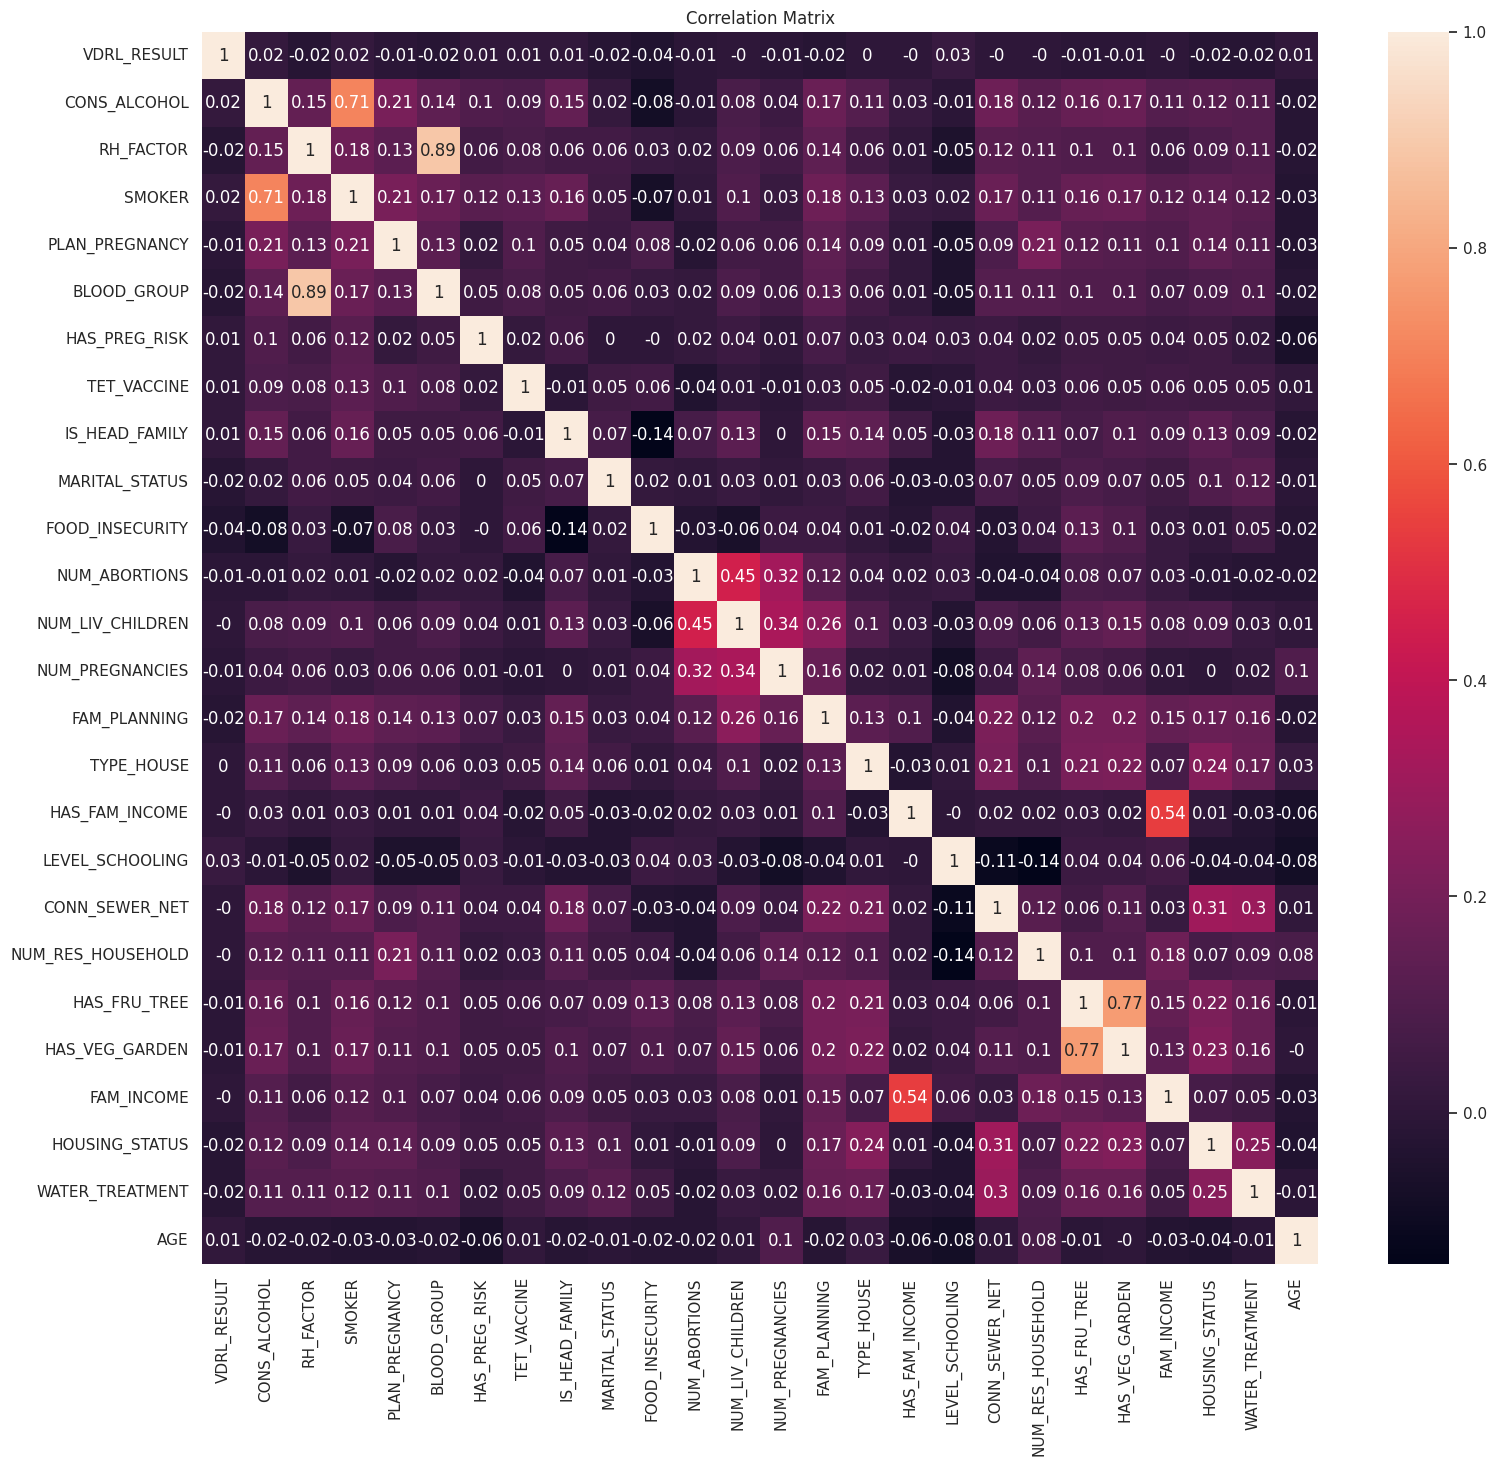

In [ ]:
# @title Analise do Dataset

correlation_matrix = df.corr().round(2)
plt.figure(figsize=(18, 16))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-389-a4bec63e4384>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VDRL_RESULT'], bins=30)


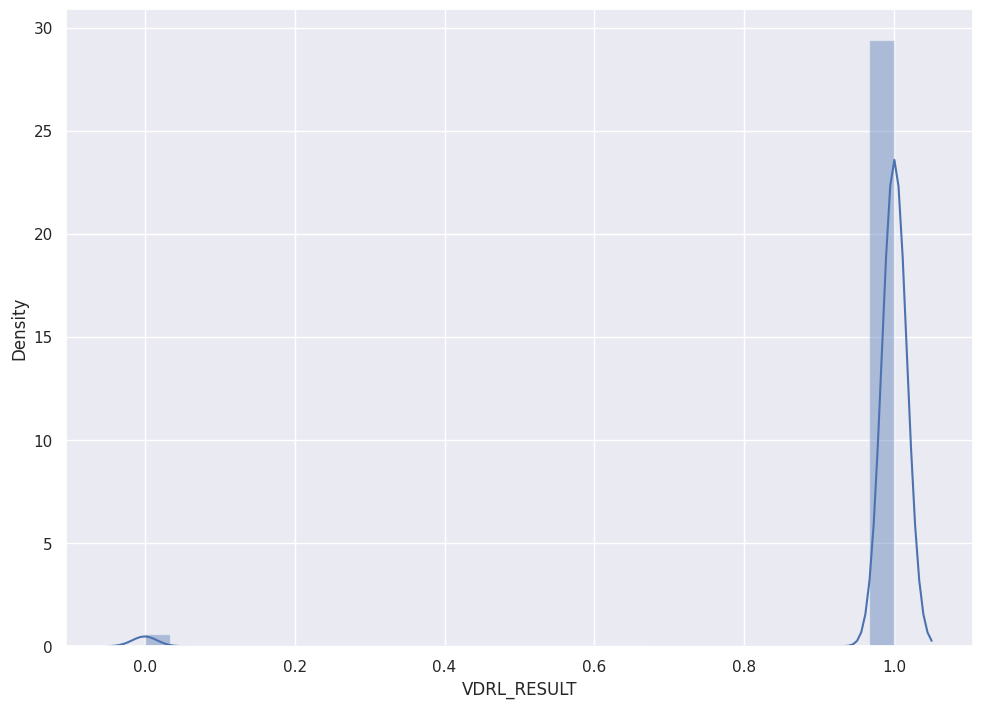

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['VDRL_RESULT'], bins=30)
plt.show()

<ipython-input-390-e439defdf0ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], bins=30)


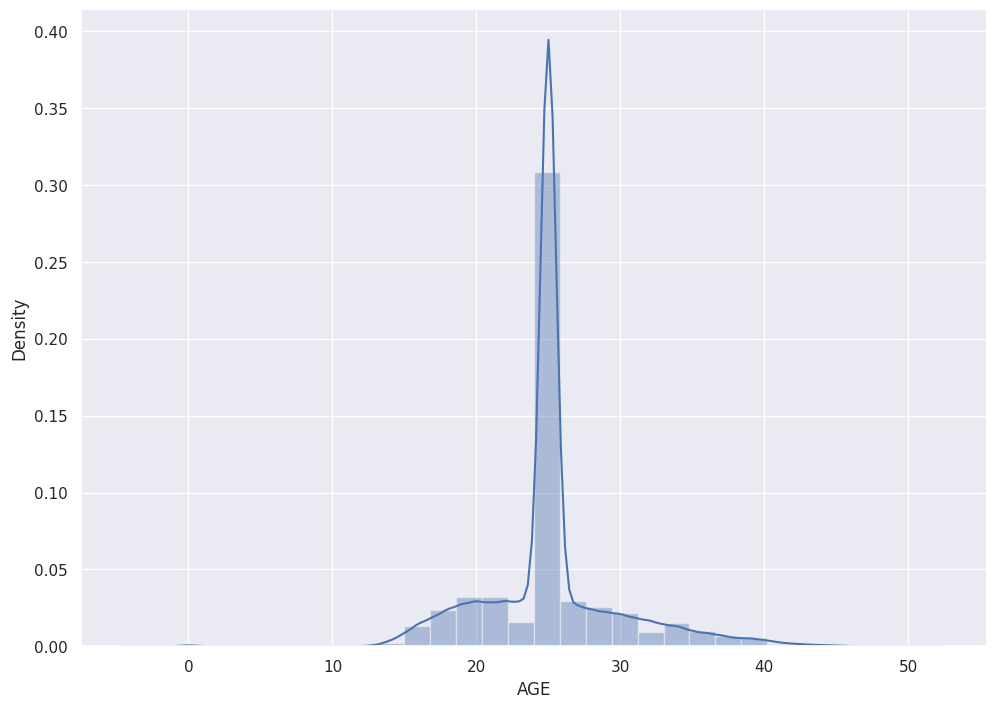

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['AGE'], bins=30)
plt.show()

A matrix de correlação e os dois plotes do gráfico, mostram uma pouca correlação e dependência entre as colunas. Isso porvávelmente se deve ao pouco balanciamento do próprio dataset e mencionado no artigo. Será aplicado BODS para consertar este problema.

**Pre-Processamento**

In [ ]:
target_classification = 'VDRL_RESULT'
target_regression = 'AGE'
features = [col for col in df.columns if col not in [target_classification, target_regression]]

#Dividindo o dataset em dois para poder aplicar um BODS apenas na parte de classificação onde esta deficiente
data_classification = df[features + [target_classification]].dropna()
data_regression = df[features + [target_regression]].dropna()

**Classificação**


In [ ]:
positiveCases = data_classification[data_classification['VDRL_RESULT'] == 0]
positiveCases

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
55,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,...,0.0,4.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0
116,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,0.0
125,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,0.0,5.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0
149,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,0.0,...,1.0,4.0,1.0,4.0,1.0,1.0,3.0,2.0,2.0,0.0
240,1.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,...,0.0,4.0,0.0,4.0,1.0,1.0,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41535,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,...,0.0,6.0,0.0,4.0,2.0,2.0,3.0,0.0,2.0,0.0
41604,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0
41690,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,0.0
41696,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,...,0.0,4.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0


In [ ]:
negativeCases = data_classification[data_classification['VDRL_RESULT'] == 1]
negativeCases

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0
2,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,1.0
3,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,2.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41757,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,...,1.0,3.0,1.0,4.0,0.0,1.0,3.0,0.0,3.0,1.0
41758,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0
41759,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,2.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0
41760,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0


In [ ]:
negativeCases_redux = negativeCases.sample(n = 826)
negativeCases_redux

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
5670,1.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,6.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0
22014,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,5.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0
27385,0.0,2.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0
16746,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,...,0.0,7.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0
39056,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,6.0,0.0,3.0,0.0,1.0,0.0,2.0,2.0,1.0
32089,1.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,5.0,2.0,...,0.0,5.0,1.0,4.0,1.0,1.0,1.0,2.0,0.0,1.0
16523,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,...,0.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
39061,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,...,0.0,6.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0


In [ ]:
data_classificationRedux = pd.concat([negativeCases_redux, positiveCases], ignore_index=True)
data_classificationRedux

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,6.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,5.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,2.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,...,0.0,7.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,...,0.0,6.0,0.0,4.0,2.0,2.0,3.0,0.0,2.0,0.0
1648,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0
1649,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,0.0
1650,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,...,0.0,4.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0


In [ ]:
#SMOTEENN na parte que será usada para classficação
X_class = data_classificationRedux[features]
y_class = data_classificationRedux[target_classification]
X_trainClass, X_testClass, y_trainClass, y_testClass = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

X_class_balanced, y_class_balanced = SMOTEENN().fit_resample(X_trainClass, y_trainClass)
print("Amostras após SMOTEENN:", len(X_class_balanced))

selector_class = SelectKBest(f_classif, k=24)
selector_class.fit(X_class_balanced, y_class_balanced)
print("Scores de SelectKBest (Classificação):", selector_class.scores_)

X_class_selected = selector_class.transform(X_class_balanced)

Amostras após SMOTEENN: 198
Scores de SelectKBest (Classificação): [2.25186411e-03 8.59841284e+01 4.86352357e-01 1.03462292e+01
 7.66244310e+01 2.44838922e+00 2.19755578e-02 1.27594688e+01
 1.10983046e+00 3.57491966e+01 4.20030875e+00 1.40991876e-01
 1.64272897e+01 2.16634637e+00 0.00000000e+00 5.91557798e-02
 1.37390839e+01 1.10384361e+00 1.40485145e-02 2.94768767e-01
 5.52363534e-02 1.13778438e+00 5.15063011e-01 1.03471779e-01]


**Comparação de modelos de classificação**

In [ ]:
y_trainClass

,VDRL_RESULT
1286,0.0
18,1.0
423,1.0
1101,0.0
285,1.0
...,...
1130,0.0
1294,0.0
860,0.0
1459,0.0


In [ ]:
y_testClass

,VDRL_RESULT
298,1.0
65,1.0
551,1.0
483,1.0
23,1.0
...,...
701,1.0
174,1.0
1142,0.0
844,0.0


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_class_selected, y_class_balanced)

RandomForestClassifier(random_state=42)

In [ ]:
# @title Fazendo previsões com o Random Forest
X_testClass = np.array(X_testClass)
y_pred_rf = model_rf.predict(X_testClass)

In [ ]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model_rf, X_class_selected, y_class_balanced, cv=kf, scoring='r2')

In [ ]:
average_r2 = np.mean(scores)
print(f"R² Score for each fold (Randon Forest): {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold (Randon Forest): [0.8, 0.5833, 0.596, 0.375, 0.3939, 0.8, 0.596, 0.6, 0.3667, 1.0]
Average R² across 10 folds: 0.61


In [ ]:
# @title Avaliando o desempenho do Random Forest
accuracy = metrics.accuracy_score(y_testClass, y_pred_rf)
recall = metrics.recall_score(y_testClass, y_pred_rf)
precision = metrics.precision_score(y_testClass, y_pred_rf)
f1 = metrics.f1_score(y_testClass, y_pred_rf)

print(f"Acurácia do modelo: {accuracy:.2f}")
print(f"Recall do modelo: {recall:.2f}")
print(f"Precisão do modelo: {precision:.2f}")
print(f"F1-score do modelo: {f1:.2f}")

Acurácia do modelo: 0.56
Recall do modelo: 0.67
Precisão do modelo: 0.55
F1-score do modelo: 0.60


In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_class_selected, y_class_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# @title Fazendo previsões com o XGBoost
y_pred_xgb = model_xgb.predict(X_testClass)

In [ ]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model_xgb, X_trainClass, y_trainClass, cv=kf, scoring='r2')

In [ ]:
average_r2 = np.mean(scores)
print(f"R² Score for each fold (XGB): {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold (XGB): [-0.8325, -0.8065, -0.6631, -0.6902, -0.7607, -1.015, -0.2988, -0.6379, -0.606, -0.5399]
Average R² across 10 folds: -0.69


In [ ]:
accuracy = metrics.accuracy_score(y_testClass, y_pred_xgb)
recall = metrics.recall_score(y_testClass, y_pred_xgb)
precision = metrics.precision_score(y_testClass, y_pred_xgb)
f1 = metrics.f1_score(y_testClass, y_pred_xgb)

print(f"Acurácia do modelo: {accuracy:.2f}")
print(f"Recall do modelo: {recall:.2f}")
print(f"Precisão do modelo: {precision:.2f}")
print(f"F1-score do modelo: {f1:.2f}")

Acurácia do modelo: 0.56
Recall do modelo: 0.62
Precisão do modelo: 0.55
F1-score do modelo: 0.58


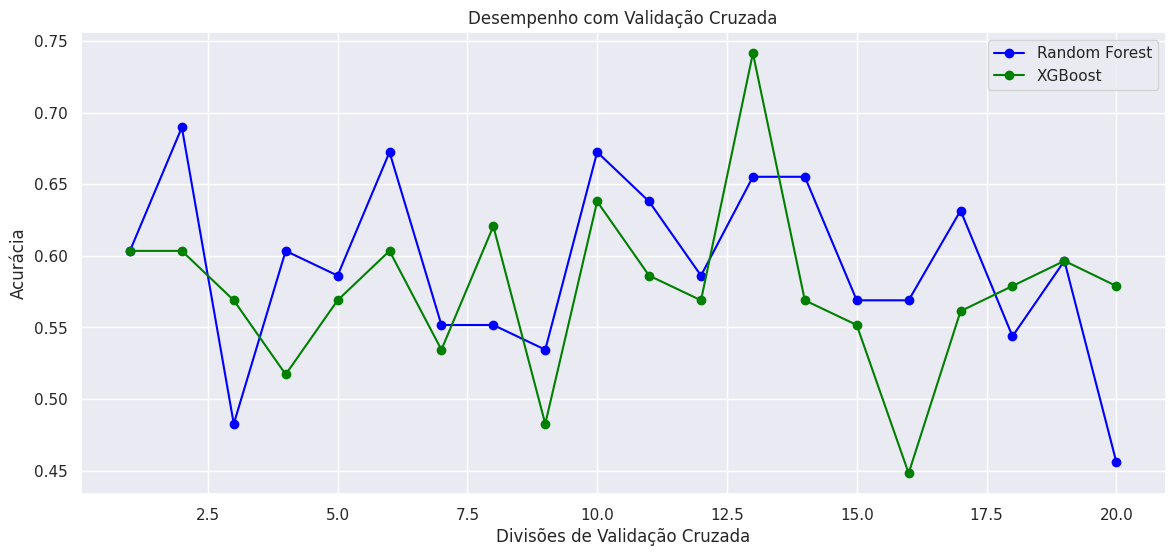

In [ ]:
scores_rf = cross_val_score(model_rf, X_trainClass, y_trainClass, cv=20, scoring='accuracy')
scores_xgb = cross_val_score(model_xgb, X_trainClass, y_trainClass, cv=20, scoring='accuracy')

# Plotando o desempenho dos dois modelos
plt.figure(figsize=(14, 6))

# Acurácia do Random Forest
plt.plot(range(1, 21), scores_rf, marker='o', color='blue', label='Random Forest')

# Acurácia do XGBoost
plt.plot(range(1, 21), scores_xgb, marker='o', color='green', label='XGBoost')

plt.title('Desempenho com Validação Cruzada')
plt.xlabel('Divisões de Validação Cruzada')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

**Regressão**

In [ ]:
#Apenas aplicando o Select por falta de necessidade
X_reg = data_regression[features]
y_reg = data_regression[target_regression]
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

selector_reg = SelectKBest(f_regression, k=24)
selector_reg.fit(X_trainReg, y_trainReg)
print("Scores de SelectKBest (Regressão):", selector_reg.scores_)

X_reg_selected = selector_reg.transform(X_trainReg)

Scores de SelectKBest (Regressão): [5.53910778e+00 1.05041191e+01 1.45098058e+01 4.88466406e+01
 1.59356572e+01 9.13306635e+01 2.41565536e-01 1.59230982e+01
 6.26953508e+00 1.11987748e+01 2.63219535e+01 1.56699402e+00
 2.82726144e+02 1.54944519e+01 1.31778424e+01 1.13805784e+02
 1.72339626e+02 8.45525275e+00 1.54398110e+02 3.89221441e+00
 1.47221550e+00 2.91585392e+01 5.90943551e+01 6.49480867e+00]
